# Import dependencies
This analysis runs on the looptrace_analysis environment, documented in https://git.embl.de/grp-ellenberg/looptrace

In [77]:
import pandas as pd
import os
import napari
from looptrace import image_io
import looptrace.trace_analysis_functions as tr
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import zarr
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#from mayavi import mlab
#mlab.init_notebook()
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.spatial.distance import squareform, pdist
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import pre-processed data

In [78]:
eG1 = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\06_LoopTrace\eG1_WT_vs_dSTAG2.csv", sep = ',')
interphase = pd.read_csv(r"C:\GIT\MExit_Brunner_2024\Data\06_LoopTrace\interphase_WT_vs_dSTAG2.csv", sep = ',')

### classification of WT / dSTAG2 was performed based on STAG2 IF intensity (see example below)

Text(0.5, 0, 'Mean intensity STAG2 (a.u.)')

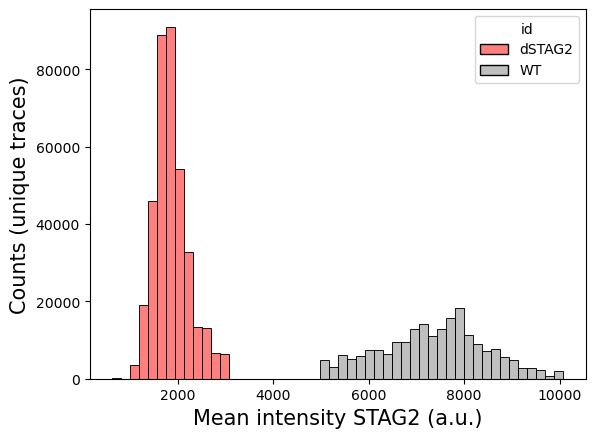

In [79]:
eG1_R1 = eG1.loc[eG1["Replicate"] == 1]
pal = {'WT': 'grey', 'dSTAG2': 'red'}
sns.histplot(data = eG1_R1.reset_index(), x = 'nuc_int', hue = 'id', palette=pal, bins = 50)
plt.ylabel("Counts (unique traces)", fontsize = 15)
plt.xlabel("Mean intensity STAG2 (a.u.)", fontsize = 15)

# Plot pairwise distance maps

In [55]:
regions = ['Chr2_1MB', 'Chr5_1MB', 'Chr14_1MB']
conditions = ['WT', 'dSTAG2']

Example plot of average distance map, and contact map (filtered for contacts below 120 nm cutoff)

c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Number of traces in heatmap:  2235
Number of traces in heatmap:  2235


c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)


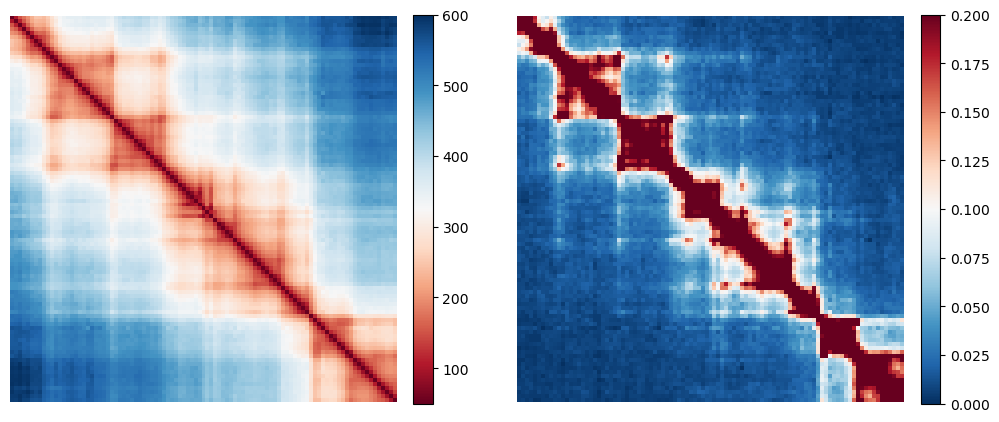

In [56]:
regions = ['Chr2_1MB', 'Chr5_1MB', 'Chr14_1MB']
conditions = ['WT', 'dSTAG2']
condition = 'WT'
region = 'Chr5_1MB'
phase = 'inter'
traces = eG1

df = tr.tracing_length_qc(traces.loc[(traces.region == region) & (traces.id == condition)], min_length=20).query('g_pos>0')
fig, ax = plt.subplots(1,2,figsize=(12,12))
dist, ax0, std = tr.plot_heatmap(df, zmin=50, zmax=600,ax=ax[0], crop=True, return_std = True)
plt.colorbar(ax0, ax = ax[0], fraction=0.046, pad=0.04)
cont, ax2 = tr.plot_contacts(df, zmin=0, zmax=0.2, ax=ax[1], cutoff=120, crop=True)
plt.colorbar(ax2, ax = ax[1], fraction=0.046, pad=0.04)

### Comparison between WT vs dSTAG2

c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


Number of traces in heatmap:  1301


c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)


Number of traces in heatmap:  1301
Number of traces in heatmap:  1301


c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


Number of traces in heatmap:  1301


c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


Number of traces in heatmap:  1285


c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)


Number of traces in heatmap:  1285
Number of traces in heatmap:  1285


c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)


Number of traces in heatmap:  1285


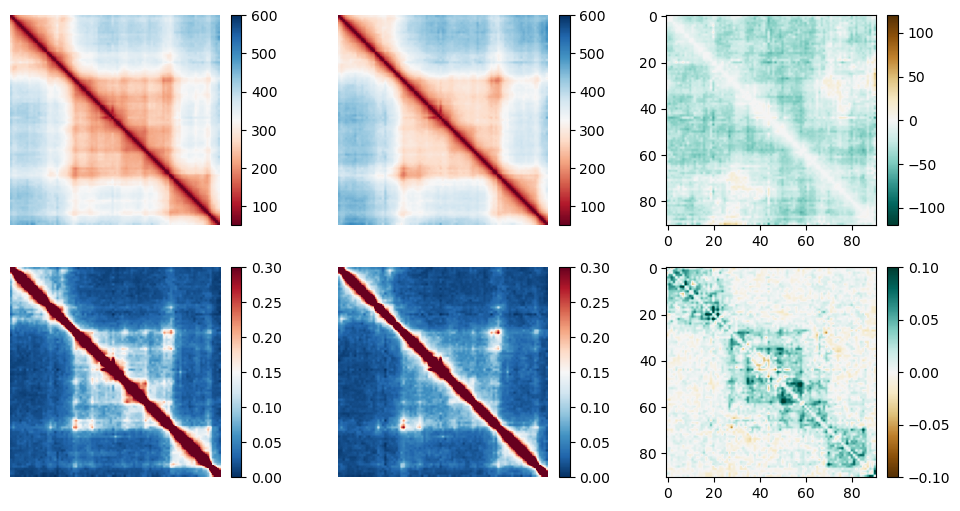

In [48]:
def contact_maps_compare(traces_qc, region, phase, cutoff = 120, dist_z_max = 600, prob_z_max = 0.5, dist_diff_min_max = 150, cont_diff_min_max = 0.1, crop = True, path = None):
    fig, ax = plt.subplots(2,3,figsize=(12,6))
    df_WT = tr.tracing_length_qc(traces_qc.loc[(traces_qc.region == region) & (traces_qc.phase == phase) & (traces_qc.id == 'WT')], min_length=20).query('g_pos>0')
    df_dSTAG2 = tr.tracing_length_qc(traces_qc.loc[(traces_qc.region == region) & (traces_qc.phase == phase) & (traces_qc.id == 'dSTAG2')], min_length=20).query('g_pos>0')
    # WT
    dist_WT_no_crop, ax0, std_WT = tr.plot_heatmap(df_WT, zmin=50, zmax=dist_z_max, ax=ax[0,0], crop=False, return_std = True)
    dist_WT, ax0, std_WT = tr.plot_heatmap(df_WT, zmin=50, zmax=dist_z_max, ax=ax[0,0], crop=True, return_std = True)
    plt.colorbar(ax0, ax = ax[0,0], fraction=0.046, pad=0.04)
    cont_WT_no_crop, ax1 = tr.plot_contacts(df_WT, zmin=0, zmax=prob_z_max, ax=ax[1,0], cutoff=120, crop=False)
    cont_WT, ax1 = tr.plot_contacts(df_WT, zmin=0, zmax=prob_z_max, ax=ax[1,0], cutoff=120, crop=True)
    plt.colorbar(ax1, ax = ax[1,0], fraction=0.046, pad=0.04)
    #dSTAG2
    dist_dSTAG2_no_crop, ax2, std_dSTAG2 = tr.plot_heatmap(df_dSTAG2, zmin=50, zmax=dist_z_max,ax=ax[0,1], crop=False, return_std = True)
    dist_dSTAG2, ax2, std_dSTAG2 = tr.plot_heatmap(df_dSTAG2, zmin=50, zmax=dist_z_max,ax=ax[0,1], crop=True, return_std = True)
    plt.colorbar(ax2, ax = ax[0,1], fraction=0.046, pad=0.04)
    cont_dSTAG2_no_crop, ax3 = tr.plot_contacts(df_dSTAG2, zmin=0, zmax=prob_z_max, ax=ax[1,1], cutoff=120, crop=False)
    cont_dSTAG2, ax3 = tr.plot_contacts(df_dSTAG2, zmin=0, zmax=prob_z_max, ax=ax[1,1], cutoff=120, crop=True)
    plt.colorbar(ax3, ax = ax[1,1], fraction=0.046, pad=0.04)
    # plot heatmap differences
    if crop == True:
        dist_diff = dist_WT-dist_dSTAG2
    else:
        dist_diff = dist_WT_no_crop-dist_dSTAG2_no_crop
    # std_dist_diff = np.mean(np.nanstd(dist_diff, axis=0))/5
    # print(std_dist_diff)
    # print('shape: ' + str(std_dist_diff.shape))
    _cmap = plt.get_cmap('BrBG_r').copy()
    # _cmap.set_bad('lightgrey')
    ax_diff_dist = ax[0,2].imshow(dist_diff, vmin=-dist_diff_min_max, vmax=dist_diff_min_max, cmap=_cmap)
    plt.colorbar(ax_diff_dist, ax = ax[0,2], fraction=0.046, pad=0.04)
    # plot contact heatmap differences
    if crop == True:
        cont_diff = cont_WT - cont_dSTAG2
    else:
        cont_diff = cont_WT_no_crop - cont_dSTAG2_no_crop
    
    _cmap = plt.get_cmap('BrBG').copy()
    # std_cont_diff = np.mean(np.nanstd(cont_diff, axis=0))*5
    # print(std_cont_diff)
    ax_diff_cont = ax[1,2].imshow(cont_diff, vmin=-cont_diff_min_max, vmax=cont_diff_min_max, cmap=_cmap)
    plt.colorbar(ax_diff_cont, ax = ax[1,2], fraction=0.046, pad=0.04)
    if path == None:
        pass
    else:
        plt.savefig(path + region +"_G1" + "_overview.pdf", dpi=500, format="pdf", transparent = True)

dist_WT = contact_maps_compare(eG1, "Chr14_1MB", phase = 'inter', cutoff = 120, dist_z_max = 600, prob_z_max = 0.3, dist_diff_min_max = 120, cont_diff_min_max = 0.1)


c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Number of traces in heatmap:  385


c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_de

Number of traces in heatmap:  385
Number of traces in heatmap:  385
Number of traces in heatmap:  385


c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


Number of traces in heatmap:  600


c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1656: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)


Number of traces in heatmap:  600
Number of traces in heatmap:  600
Number of traces in heatmap:  600


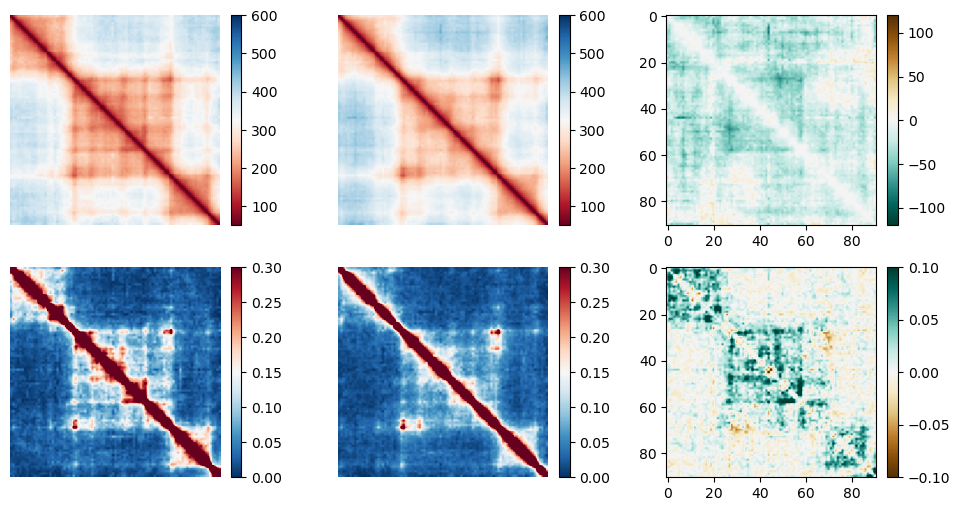

In [49]:
contact_maps_compare(interphase, "Chr14_1MB", phase = 'inter', cutoff = 120, dist_z_max =600, prob_z_max = 0.3, dist_diff_min_max = 120, cont_diff_min_max = 0.1)

# View single traces

In [57]:
regions = ['Chr2_1MB', 'Chr5_1MB', 'Chr14_1MB']
conditions = ['WT', 'dSTAG2']
condition = 'WT'
region = 'Chr14_1MB'
phase = 'inter'
#subset traces for region, condition and phase
df = tr.tracing_length_qc(eG1.loc[(eG1.region == region) & (eG1.id == condition) & (eG1.phase == phase)], min_length=20).query('g_pos>0')

In [58]:
#df = tr.tracing_length_qc(traces_qc.loc[(traces_qc.phase == phase)], min_length=10)#.query('hyb>"H25" & hyb<"H44"')#.query('hyb<"H26"')
ids = df.groupby('trace_id').QC.sum().sort_values(ascending=False).head(100).index.to_list()#[df.trace_id.isin(nonloop_trace_ids)]
spot_id=ids[np.random.randint(0,100)]

spot_id = 5233#11000#3801
points = df.query('trace_id == @spot_id')[['z', 'y', 'x', 'QC']].to_numpy()
points = points[points[:,3]==1]
#to center points to 0 and make scale bars more accurate
for i in range(0,3,1):
    points[:,i] = points[:,i] - np.mean(points[:,i])
points = points[tr.rolling_distance_filter(points[:,:3], window=5, k=5)]
fig, ax = plt.subplots(1,3, figsize=(20,15))
tr.plot_2d_proj(points, limits=(-1000, 1000), ax=ax[0])
tr.plot_contacts(df, trace_ids=spot_id, ax=ax[1], cmap='gray', cutoff=200, crop=True)
tr.plot_heatmap(df, trace_ids=spot_id, ax=ax[2],crop=True, zmin=50, zmax=600)
print(spot_id, len(points))

Number of traces in heatmap:  1
Number of traces in heatmap:  1
5233 88


c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1662: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1662: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


### Myavi Visualization of eG1 trace

In [59]:
fig = tr.trace_3d_mayavi(points = points, distance = 2, axes=True)

## Interphase

In [80]:
regions = ['Chr2_1MB', 'Chr5_1MB', 'Chr2_full', 'Chr2_12Mb', 'Chr14_full',
       'Chr14_11Mb', 'Chr14_1MB', 'Chr18_13Mb']
conditions = ['WT', 'dSTAG2', 'nan']
condition = 'WT'
region = 'Chr14_1MB'
phase = 'inter'
df = tr.tracing_length_qc(interphase.loc[(interphase.region == region) & (interphase.id == condition)& (interphase.phase == phase)], min_length=20).query('g_pos>0')

Number of traces in heatmap:  1
Number of traces in heatmap:  1
13927 86


c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1662: RuntimeWarning: divide by zero encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\git\looptrace_dev\looptrace\trace_analysis_functions.py:1662: RuntimeWarning: invalid value encountered in divide
  dist = np.nansum(pwds<cutoff, axis=0)/np.nansum(pwds>0, axis=0)
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
c:\Users\abrunner\Anaconda3\envs\looptrace_analysis\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


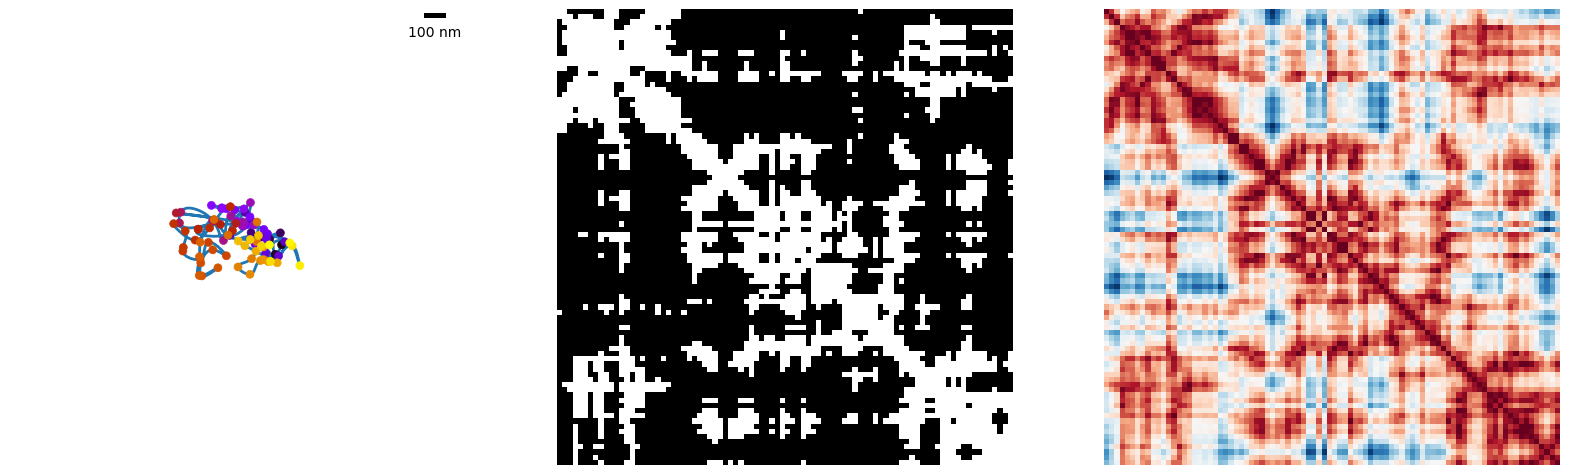

In [61]:
ids = df.groupby('trace_id').QC.sum().sort_values(ascending=False).head(100).index.to_list()#[df.trace_id.isin(nonloop_trace_ids)]
spot_id=ids[np.random.randint(0,100)]
spot_id = 13927#10592
points = df.query('trace_id == @spot_id')[['z', 'y', 'x', 'QC']].to_numpy()
points = points[points[:,3]==1]
#to center points to 0 and make scale bars more accurate
for i in range(0,3,1):
    points[:,i] = points[:,i] - np.mean(points[:,i])
points = points[tr.rolling_distance_filter(points[:,:3], window=5, k=5)]
fig, ax = plt.subplots(1,3, figsize=(20,15))
tr.plot_2d_proj(points, limits=(-1000, 1000), ax=ax[0])
tr.plot_contacts(df, trace_ids=spot_id, ax=ax[1], cmap='gray', cutoff=200, crop=True)
tr.plot_heatmap(df, trace_ids=spot_id, ax=ax[2],crop=True, zmin=50, zmax=600)
print(spot_id, len(points))

### Myavi Visualization of interphase trace

In [62]:
fig = tr.trace_3d_mayavi(points = points, distance = 2, axes=True)

# Scaling plots

In [105]:
# define function to round genomic distance to nearest multiple
def round_to_nearest_multiple(number, multiple):
    return np.round(number / multiple) * multiple

def scaling_plot_all1Mb(traces_qc):
    regions = ['Chr5_1MB', 'Chr2_1MB', 'Chr14_1MB']
    conditions = ['WT', 'dSTAG2']
    phase = 'inter'
    av_metrics = []
    distances = []
    trace_metrics = []
    for region in regions:
        for condition in conditions:
            print(condition, phase, region)
            df = traces_qc.loc[(traces_qc.phase == phase) & (traces_qc.region==region) & (traces_qc.id==condition) & (traces_qc.g_pos>0)]#.query('hyb<"H26"')
            pwds = tr.pwd_calc(df)
            g_dists = np.repeat(squareform(pdist(df.groupby('trace_id')[['g_pos']].get_group(df.trace_id.unique()[0]).values))[None,:,:], repeats=pwds.shape[0],axis=0) #Read genomic distances from probes list and match to pwd matrix.
            dists = pd.DataFrame(np.stack([pwds.ravel(), g_dists.ravel()]).T, columns=['dist', 'g_dist'])
            stds = pd.DataFrame(np.stack([pwds.ravel(), g_dists.ravel()]).T, columns=['dist', 'g_dist'])
            dists['region'] = region
            dists['phase'] = phase
            dists['condition'] = condition
            dists['rolling'] = dists.dist.rolling(5).mean()
            distances.append(dists)
    distances = pd.concat(distances).reset_index(drop=True)
    # distances = pd.concat(distances, axis=0).reset_index(drop=True)
    if region in ['Chr2_1MB', 'Chr5_1MB', 'Chr14_1MB']:
        distances['g_dist'] = round_to_nearest_multiple(distances['g_dist']/1000,12)
    else: 
        pass

    sns.relplot(data=distances[distances.g_dist > 0].groupby(['condition', 'phase', 'g_dist']).dist.median().reset_index(), x='g_dist', y='dist', hue='condition', kind='line', palette='tab10', linewidth=3)

## early G1

In [21]:
scaling_plot_all1Mb(eG1)

WT inter Chr5_1MB
dSTAG2 inter Chr5_1MB
WT inter Chr2_1MB
dSTAG2 inter Chr2_1MB
WT inter Chr14_1MB
dSTAG2 inter Chr14_1MB


WT inter Chr5_1MB
dSTAG2 inter Chr5_1MB
WT inter Chr2_1MB
dSTAG2 inter Chr2_1MB
WT inter Chr14_1MB
dSTAG2 inter Chr14_1MB


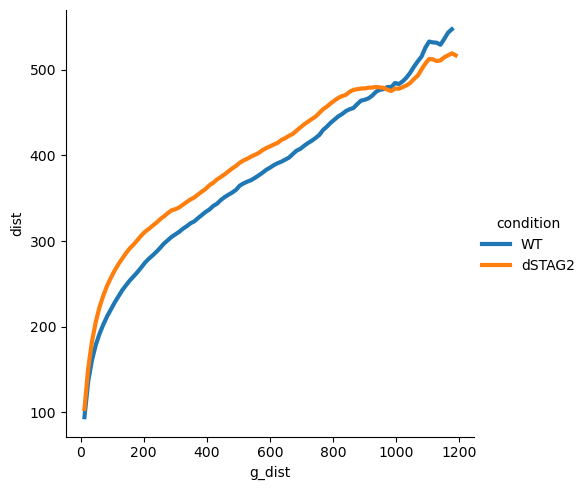

In [106]:
scaling_plot_all1Mb(interphase)

# Trace metrics

In [107]:
def compute_trace_metrics(traces, phases, region, min_length = 80, diagonal = 3, contact_cutoff = 100, loop_stacking_error = 2):
       loop_metrics = []
       trace_metrics = []

       for cell_type in id:
              for phase in phases:
                     print(cell_type, phase, region)
                     df = traces.loc[(traces.phase == phase) & (traces.region==region) & (traces.id==cell_type) & (traces.g_pos>0)]
                     df = tr.tracing_length_qc(df, min_length=min_length)
                     pwds = tr.pwd_calc(df,)
                     g_dists = np.repeat(squareform(pdist(df.groupby('trace_id')[['g_pos']].get_group(df.trace_id.unique()[0]).values))[None,:,:], repeats=pwds.shape[0],axis=0) #Read genomic distances from probes list and match to pwd matrix.
                     dists = pd.DataFrame(np.stack([pwds.ravel(), g_dists.ravel()]).T, columns=['dist', 'g_dist'])
                     stds = pd.DataFrame(np.stack([pwds.ravel(), g_dists.ravel()]).T, columns=['dist', 'g_dist'])

                     single_trace_metrics, single_loop_metrics = tr.trace_metrics(df, diagonal=diagonal, contact_cutoff=contact_cutoff, loop_stacking_error=loop_stacking_error)
                     single_trace_metrics['region'] = region
                     single_trace_metrics['phase'] = phase
                     single_trace_metrics['cell_type'] = cell_type
                     single_loop_metrics['region'] = region
                     single_loop_metrics['phase'] = phase
                     single_loop_metrics['cell_type'] = cell_type
                     trace_metrics.append(single_trace_metrics)
                     loop_metrics.append(single_loop_metrics)
       trace_metrics = pd.concat(trace_metrics).reset_index(drop=True)
       loop_metrics = pd.concat(loop_metrics).reset_index(drop=True)
       return trace_metrics, loop_metrics

def compute_trace_metrics_all(traces, phase, regions, min_length = 80, diagonal = 3, contact_cutoff = 100, loop_stacking_error = 2):
       loop_metrics = []
       trace_metrics = []
       for cell_type in id:
              for region in regions:
                     print(region)
                     print(cell_type, phase, region)
                     df = traces.loc[(traces.phase == phase) & (traces.region==region) & (traces.id==cell_type) & (traces.g_pos>0)]
                     df = tr.tracing_length_qc(df, min_length=min_length)
                     pwds = tr.pwd_calc(df,)
                     g_dists = np.repeat(squareform(pdist(df.groupby('trace_id')[['g_pos']].get_group(df.trace_id.unique()[0]).values))[None,:,:], repeats=pwds.shape[0],axis=0) #Read genomic distances from probes list and match to pwd matrix.
                     dists = pd.DataFrame(np.stack([pwds.ravel(), g_dists.ravel()]).T, columns=['dist', 'g_dist'])
                     stds = pd.DataFrame(np.stack([pwds.ravel(), g_dists.ravel()]).T, columns=['dist', 'g_dist'])

                     single_trace_metrics, single_loop_metrics = tr.trace_metrics(df, diagonal=diagonal, contact_cutoff=contact_cutoff, loop_stacking_error=loop_stacking_error)
                     single_trace_metrics['region'] = region
                     single_trace_metrics['phase'] = phase
                     single_trace_metrics['cell_type'] = cell_type
                     single_loop_metrics['region'] = region
                     single_loop_metrics['phase'] = phase
                     single_loop_metrics['cell_type'] = cell_type
                     trace_metrics.append(single_trace_metrics)
                     loop_metrics.append(single_loop_metrics)
       trace_metrics = pd.concat(trace_metrics).reset_index(drop=True)
       loop_metrics = pd.concat(loop_metrics).reset_index(drop=True)
       return trace_metrics, loop_metrics


def adjust_dist(trace_metrics, loop_metrics, region):
       if region in ['Chr2_1MB', 'Chr5_1MB', 'Chr14_1MB']:
              trace_metrics['av_loop_gsize'] = trace_metrics['av_loop_gsize']*12
              loop_metrics['g_dist'] = loop_metrics['g_dist']*12
       elif region in ['Chr2_12Mb', 'Chr14_11Mb', 'Chr18_13Mb']:
              trace_metrics['av_loop_gsize'] = trace_metrics['av_loop_gsize']*200
              loop_metrics['g_dist'] = loop_metrics['g_dist']*200
       return trace_metrics, loop_metrics

In [108]:
id = ['WT', 'dSTAG2']
phases= ['inter']
region = 'Chr2_1MB'

trace_metrics, loop_metrics = compute_trace_metrics(interphase, phases, region, diagonal = 2, contact_cutoff = 100, loop_stacking_error = 3)
trace_metrics, loop_metrics = adjust_dist(trace_metrics, loop_metrics, region)

WT inter Chr2_1MB


100%|██████████| 312/312 [00:05<00:00, 61.96it/s] 


dSTAG2 inter Chr2_1MB


100%|██████████| 1351/1351 [00:09<00:00, 144.11it/s]


In [109]:
id = ['WT', 'dSTAG2']
phases= 'inter'
regions = ["Chr2_1MB", 'Chr5_1MB', 'Chr14_1MB']
# for all regions combined
trace_metrics, loop_metrics = compute_trace_metrics_all(interphase, phases, regions, diagonal = 2, contact_cutoff = 100, loop_stacking_error = 3)
trace_metrics, loop_metrics = adjust_dist(trace_metrics, loop_metrics, region)

Chr2_1MB
WT inter Chr2_1MB


100%|██████████| 312/312 [00:02<00:00, 133.21it/s]


Chr5_1MB
WT inter Chr5_1MB


100%|██████████| 447/447 [00:02<00:00, 166.39it/s]


Chr14_1MB
WT inter Chr14_1MB


100%|██████████| 273/273 [00:02<00:00, 129.86it/s]


Chr2_1MB
dSTAG2 inter Chr2_1MB


100%|██████████| 1351/1351 [00:09<00:00, 143.84it/s]


Chr5_1MB
dSTAG2 inter Chr5_1MB


100%|██████████| 1397/1397 [00:08<00:00, 158.11it/s]


Chr14_1MB
dSTAG2 inter Chr14_1MB


100%|██████████| 434/434 [00:03<00:00, 143.16it/s]


n_contacts, WT: 24.4796511627907 median: 24.0
n_contacts, dSTAG2: 21.636706473915776 median: 21.0
ratio WT/dSTAG2 median: -14.29%


n_base_loops, WT: 13.843023255813954 median: 14.0
n_base_loops, dSTAG2: 13.172847265870521 median: 13.0
ratio WT/dSTAG2 median: -7.69%


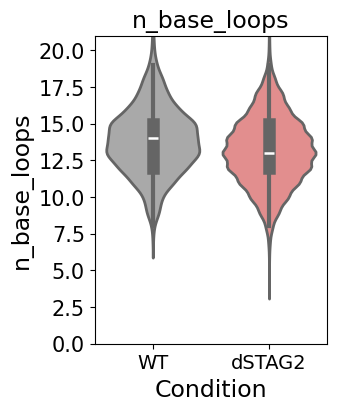

elongation, WT: 0.5956604019258299 median: 0.624477125525542
elongation, dSTAG2: 0.5740526612820543 median: 0.5960308768046993
ratio WT/dSTAG2 median: -4.77%


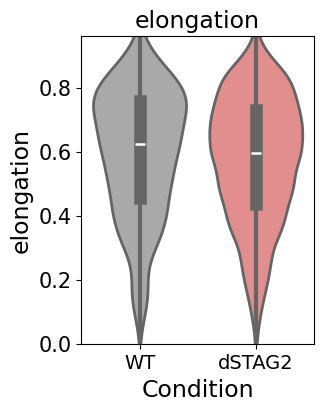

rog, WT: 264.91279243025195 median: 250.67617845476911
rog, dSTAG2: 287.1565007866661 median: 276.35364783721604
ratio WT/dSTAG2 median: 9.29%


contour, WT: 9389.944032447731 median: 9058.103199252426
contour, dSTAG2: 10510.0501089033 median: 10112.195041447998
ratio WT/dSTAG2 median: 10.42%


av_loop_size, WT: 1264.0054146316256 median: 1177.676639062357
av_loop_size, dSTAG2: 1570.815608782111 median: 1473.9204769278258
ratio WT/dSTAG2 median: 20.1%


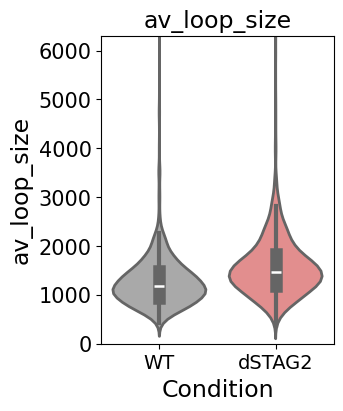

av_loop_gsize, WT: 157.2093023255814 median: 156.0
av_loop_gsize, dSTAG2: 174.59396605908233 median: 168.0
ratio WT/dSTAG2 median: 7.14%


av_nn_dist, WT: 94.56895841542791 median: 94.02714067331446
av_nn_dist, dSTAG2: 103.92849974666174 median: 102.59181172389029
ratio WT/dSTAG2 median: 8.35%


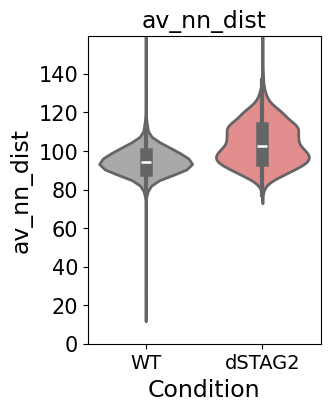

std_nn_dist, WT: 52.81529212427735 median: 38.649339997435845
std_nn_dist, dSTAG2: 63.252329732235864 median: 49.22873159229663
ratio WT/dSTAG2 median: 21.49%


interp_contour, WT: 7099.811621855919 median: 6792.481614986286
interp_contour, dSTAG2: 8045.783742510431 median: 7683.987554763548
ratio WT/dSTAG2 median: 11.6%


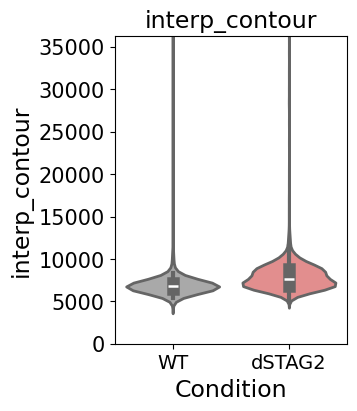

interp_rog, WT: 220.3674837437329 median: 201.4596283127051
interp_rog, dSTAG2: 241.55848361422116 median: 228.2699253821835
ratio WT/dSTAG2 median: 11.74%


freq_nested, WT: 0.41193653984246903 median: 0.4166666666666667
freq_nested, dSTAG2: 0.3695576281267997 median: 0.375
ratio WT/dSTAG2 median: -11.11%


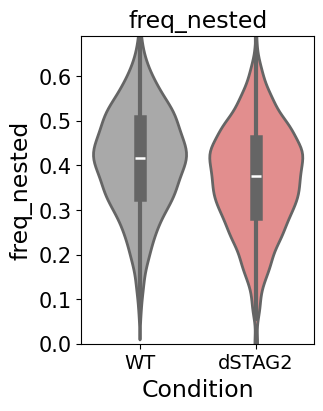

knn_mean, WT: 22.280925273095853 median: 21.7700754975978
knn_mean, dSTAG2: 18.00951402184492 median: 17.430194805194805
ratio WT/dSTAG2 median: -24.9%


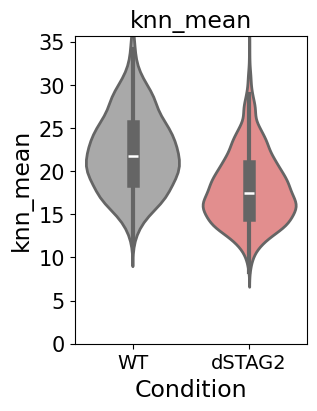

knn_std, WT: 8.721186563765507 median: 8.621505712987814
knn_std, dSTAG2: 7.582878670642196 median: 7.371185407303377
ratio WT/dSTAG2 median: -16.96%


n_points, WT: 89.5436046511628 median: 90.0
n_points, dSTAG2: 88.62853551225645 median: 89.0
ratio WT/dSTAG2 median: -1.12%


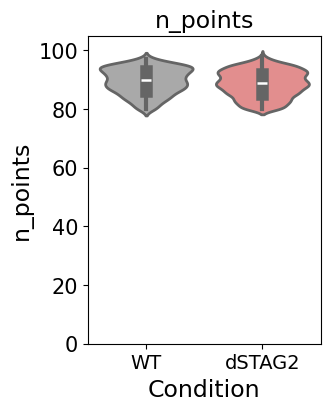

In [110]:
metrics_list = trace_metrics.columns.tolist()
metrics_list.remove('trace_id')
metrics_list.remove('cell_type')
metrics_list.remove('phase')
metrics_list.remove('region')
pal = {'WT' : 'darkgrey', 'dSTAG2': 'lightcoral'}
for trace_metric in metrics_list:
    plt.rcParams["figure.figsize"] = (3,4)
    print(str(trace_metric) + ', WT: ' + str(np.mean(trace_metrics[trace_metric].loc[trace_metrics['cell_type'] == 'WT'])) + " median: "+ str(np.median(trace_metrics[trace_metric].loc[trace_metrics['cell_type'] == 'WT'])))
    print(str(trace_metric) + ', dSTAG2: ' + str(np.mean(trace_metrics[trace_metric].loc[trace_metrics['cell_type'] == 'dSTAG2']))+ " median: "+ str(np.median(trace_metrics[trace_metric].loc[trace_metrics['cell_type'] == 'dSTAG2'])))
    print('ratio WT/dSTAG2 median: ' + str(round((100-np.median(trace_metrics[trace_metric].loc[trace_metrics['cell_type'] == 'WT'])/np.median(trace_metrics[trace_metric].loc[trace_metrics['cell_type'] == 'dSTAG2'])*100),2)) + '%')
    # sns.set_palette('rainbow')
    sns.violinplot(data=trace_metrics, y=trace_metric, x='cell_type', hue = 'cell_type', palette=pal, linewidth=2)# common_norm=False, bw_adjust=0.5)
    ymin = 0
    if type(trace_metrics[trace_metric].max()) is str:
        pass
    elif str(trace_metric) == 'n_points':
        ymax = 105
    else:
        ymax = trace_metrics[trace_metric].quantile(0.999)
    plt.yticks(fontsize = 15)
    plt.xticks(['WT', 'dSTAG2'], fontsize =14)
    plt.ylabel(ylabel = str(trace_metric), fontsize = 17)
    plt.xlabel(xlabel = 'Condition', fontsize = 17)
    plt.title(str(trace_metric), fontsize = 17)
    plt.ylim(ymin,ymax)
    
    plt.show()